

Olá estudante!

Me chamo Rafael Meirelles e irei revisar o seu projeto hoje e em eventuais futuras submissões até que ele cumpra todos os requisitos para o aceite.
Conte comigo nessa jornada e não se preocupe se precisar ajustar alguns detalhes, é parte do processo e fundamental para que você exercite os conceitos que vem aprendendo e assim melhore a qualidade dos seus códigos e análises.

**Peço que mantenha e não altereos comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:


<div class="alert alert-danger">
<strong>Vermelho</strong>

Erro que precisa ser consertado, caso contrário, seu projeto não pode ser aceito

</div>

<div class="alert alert-warning">
<strong>Amarelo</strong>

Alerta de um erro não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise

</div>

<div class="alert alert-success">
<strong>Verde</strong>

Elogios
</div>

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Use uma caixa azul como essa para eventuais comentários que você gostaria de fazer para mim.
</div>






<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Estamos no caminho certo com essa versão, mas retocar os pontos indicados abaixo nos fará chegar em um resultado ainda mais incrível.
    
Conte comigo para ajudá-lo (a) em qualquer questão que possa vir a ter! Lembre-se de usar as caixas azuis para se comunicar comigo.
    
Até breve.
</div>


# Projeto Integrado 1 Análise de Dados para loja online Ice

Objetivo: 

Entender padrões e estabelecer um comportamento de consumidor que ajude a preparar futuras campanhas publicitárias para jogos, aumentando as vendas.

## Bibliotecas

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

## Carregando os Dados

In [40]:
df = pd.read_csv('/datasets/games.csv')

In [41]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Análise dos Dados

### Informações Gerais

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


A coluna 'year_of_release' está como float. Isso não faz sentido. Seria melhor que fosse do tipo object ou do tipo int. Para poder fazer operações referentes a idade dos jogos, caso entenda que é necessário, vou deixar como tipo int.

A coluna 'User_Score' é do tipo object, mas deveria ser do tipo int ou float. O melhor será tipo float, provavelmente.

Existem colunas com valores faltantes. É necessário entender porque certos valores não são apresentados na tabela

### Substituir os nomes das colunas (Tudo minúsculo)

In [43]:
df.columns = df.columns.str.lower()

In [44]:
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


### Convertendo Dados

#### Convertendo user_score

Começando por 'user_score', é muito provável que o tipo object se de ao fato de "tbd" ter sido atribuído para muitos jogos que ainda não têm a nota dos usuários. Mas, para confirmar isso, vamos chamar o value counts.

In [45]:
df['user_score'].value_counts()[:10]

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
Name: user_score, dtype: int64

In [46]:
print(df['user_score'].dtype)

object


Aqui, confirmamos como "tbd" aparece em grande quantidade e como o tipo de dado é mesmo object. Vamos transformar os valores "tbd" em Nan e converter toda a coluna para o tipo float.

In [47]:
df['user_score'] = df['user_score'].replace("tbd", np.nan)
df['user_score'] = df['user_score'].astype(float)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


#### Convertendo "year_of_release"

Seguindo para 'year_of_release', gostaríamos que esses dados fossem do tipo int, mas eles são do tipo float. Isso, certamente, porque existem valores na, indicados no método info. Vamos testar a hipótese. 

In [49]:
df['year_of_release'].isna().sum()

269

In [50]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [51]:
game_name = "Madden NFL 2004"
df[df['name']==game_name]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
1881,Madden NFL 2004,XB,2003.0,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E
3889,Madden NFL 2004,GC,2003.0,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E
5708,Madden NFL 2004,GBA,2003.0,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E


In [52]:
game_name_2 ="Space Invaders"
df[df['name']==game_name_2]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,Space Invaders,N64,1999.0,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10383,Space Invaders,GBA,2002.0,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


verificamos, com dois jogos diferentes, que o mesmo jogo pode ter sido lançado em plataformas diferentes e em datas diferentes. Ao invés de eliminar os dados, vamos substituir, com estimativas, alguns valores na por medianas para aqueles jogos que temos informações suficientes para fazer isso.

In [53]:
df['year_of_release'] = df['year_of_release'].fillna(df.groupby(['name'])['year_of_release'].transform('median'))

In [54]:
game_name_2 ="Space Invaders"
df[df['name']==game_name_2]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
609,Space Invaders,2600,1999.0,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
4264,Space Invaders,SNES,1994.0,Shooter,0.00,0.00,0.46,0.00,NaN,NaN,NaN
8580,Space Invaders,N64,1999.0,Shooter,0.13,0.03,0.00,0.00,NaN,NaN,NaN
10383,Space Invaders,GBA,2002.0,Shooter,0.08,0.03,0.00,0.00,NaN,NaN,NaN


In [55]:
df['year_of_release'].isna().sum()

146

Depois de rodas o teste com o jogo Space invaders uma segunda vez, percebemos que a data NaN foi substituída pela mediana com sucesso, mas que 146 linhas ainda permanecem com os valores inexistentes. Isso certamente porque não haviam informações suficientes para o cálculo da mediana. Como 146 é uma parcela muito ínfima dos dados, vamos removê-los. Depois, poderemos converter para inteiro.

In [56]:
df = df.dropna(subset=['year_of_release'])

In [57]:
df['year_of_release'].isna().sum()

0

In [58]:
df['year_of_release'] = df['year_of_release'].astype(int)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16569 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16569 non-null  object 
 2   year_of_release  16569 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16569 non-null  float64
 5   eu_sales         16569 non-null  float64
 6   jp_sales         16569 non-null  float64
 7   other_sales      16569 non-null  float64
 8   critic_score     8075 non-null   float64
 9   user_score       7540 non-null   float64
 10  rating           9868 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


Todos os tipos de dados problemáticos foram convertidos para os tipos corretos e pouquíssimos dados foram excluídos da tabela. Agora, podemos avançar para a verificaçao do porque outros dados estão ausentes em um próximo passo.

### Verficiando valores ausentes

In [60]:
df_a = df.isna().sum()
df_a[df_a>0]

name               2
genre              2
critic_score    8494
user_score      9029
rating          6701
dtype: int64

In [61]:
df = df.dropna(subset=['name', 'genre'])

In [62]:
df_a = df.isna().sum()
df_a[df_a>0]

critic_score    8492
user_score      9027
rating          6699
dtype: int64

Aqui, começando passando um código para verificar quais colunas ainda tinham valores ausentes e a quantidade de dados faltantes em cada. Para as colunas 'name' e 'genre', tomei a decisão de remover os dados, porque ambas só tinham dois jogos com as informações faltantes. Poddemos seguir sem eles. 

para as colunas 'critic_score', 'user-score' e 'rating', não há como preencher os dados com qualquer valor sem impactar diretamente no resultado da análise. Fora isso, esses valores estão ausentes porque as notas de usuários e críticos, bem como a classificação da ESRB ainda não existem. Para completar, decidi que a falta desses dados não vai impactar na análise. Seguiremo sem preenchimento.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Luiz, temos alguns pontos aqui:
    
    
- Estou de acordo com a decisão nas colunas de avaliação. O valor escolhido para preencher não impactará nas análises que faremos mais a frente.
    
- Os ausentes da coluna ano de lançamento foram tratados de uma forma elegante. Buscar informações nos lançamentos que o título teve em outras plataformas foi uma baita ideia.

</div>


### Calculando o total de vendas e criando novas colunas

In [63]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [64]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


Como pedido no projeto, criamos uma nova coluna com os valores totais de venda de cada jogo

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Vendas totais foram calculadas!

</div>


## (Etapa 3) Análise de Dados

### Lançamentos por ano

Seguimos para a etapa de análise de dados e vamos responder as perguntas e atender a todos os requisitos do projeto. O primeiro é: Veja quantos jogos foram lançados em anos diferentes Os dados de cada período são significativos?

In [65]:
year_count = df['year_of_release'].value_counts().sort_index()

In [66]:
year_count.head()

1980     9
1981    46
1982    36
1983    17
1984    14
Name: year_of_release, dtype: int64

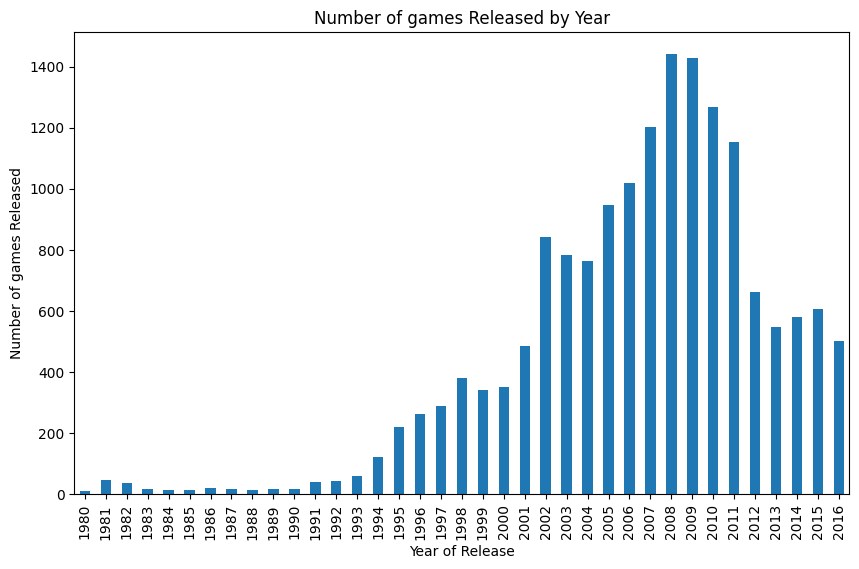

In [67]:
plt.figure(figsize=(10, 6))
year_count.plot(kind='bar')
plt.xlabel('Year of Release')
plt.ylabel('Number of games Released')
plt.title('Number of games Released by Year')
plt.show()

Aqui, separamos os jogos por ano de lançamento e, em seguida criamos um gráfico para facilitar a visualização das informações. Percebemos que até 1995, os lançamentos eram mínimos, o que faz sentido, levando em consideração a época, as limitações tecnológicas, a popularização dos videogames e a quantidade de consoles no mundo. É a partir de 2001, porém, que os lançamentos realmente se tornam mais expressivos.

Percebemos duas explosões nos valores, em 2002 e 2006, com o gráfico atingindo o pico em 08 e 09, época que coincide com o auge da terceira geração de consoles (PS3, X360 e a popularização de outros consoles como Wii e os PCs). De qualquer forma, esse momento de super alta já passou e os valores, a partir de 2012, estão estabilizados na faixa dos 600 lançamentos. Analisando só esse gráfico, entendo que vale manter a analise a partir desse período. Essa deve ser a tendência para 2017.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Bom trabalho, os lançamentos por ano foram investigados!
</div>


### Vendas totais por plataforma

A segunda pergunta a responder é: Veja como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano. Encontre as plataformas que costumavam ser populares, mas agora não têm vendas. Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?

In [68]:
platform_sales = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

In [69]:
top_platforms = platform_sales.head(6).index

In [70]:
top_platforms

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'], dtype='object', name='platform')

Até aqui, criamos uma tabela para classificar as melhores plataformas de acordo com o número de vendas de jogos. Selecionamos as 6 primeiras, porque elas têm uma quantidade de vendas muito superior se comparadas com a sétima plataforma em diante. Usar menos plataformas aqui também facilita a visualização do gráfico para entendermos a "vida útil" de cada console.

In [71]:
sales_by_year = df[df['platform'].isin(top_platforms)].groupby(['platform', 'year_of_release'])['total_sales'].sum().unstack()

In [72]:
sales_by_year

year_of_release,1985,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
DS,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,147.23,145.36,119.56,85.35,26.33,11.67,1.54,NaN,NaN,NaN
PS,NaN,6.03,35.96,94.7,136.17,169.49,144.53,96.37,35.59,6.67,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PS2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.17,166.43,208.36,...,76.10,53.90,26.40,5.64,0.45,NaN,NaN,NaN,NaN,NaN
PS3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,73.19,118.79,130.93,142.96,157.98,108.28,113.25,47.76,16.82,3.60
Wii,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,153.41,177.68,206.97,128.67,59.79,22.94,8.59,3.75,1.14,0.18
X360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,95.41,136.07,120.82,170.55,145.23,100.72,88.58,34.74,11.96,1.52


In [73]:
sales_by_year = sales_by_year.fillna(0)
sales_by_year

year_of_release,1985,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
platform,,,,,,,,,,,,,,,,,,,,,
DS,0.02,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,147.23,145.36,119.56,85.35,26.33,11.67,1.54,0.00,0.00,0.00
PS,0.00,6.03,35.96,94.7,136.17,169.49,144.53,96.37,35.59,6.67,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
PS2,0.00,0.00,0.00,0.0,0.00,0.00,0.00,39.17,166.43,208.36,...,76.10,53.90,26.40,5.64,0.45,0.00,0.00,0.00,0.00,0.00
PS3,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,73.19,118.79,130.93,142.96,157.98,108.28,113.25,47.76,16.82,3.60
Wii,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,153.41,177.68,206.97,128.67,59.79,22.94,8.59,3.75,1.14,0.18
X360,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,95.41,136.07,120.82,170.55,145.23,100.72,88.58,34.74,11.96,1.52


Nesse trecho, tudo o que fizemos foi criar a tabela sales_by_year, que indica, para as seis plataformas mais populares, o número de vendas por ano

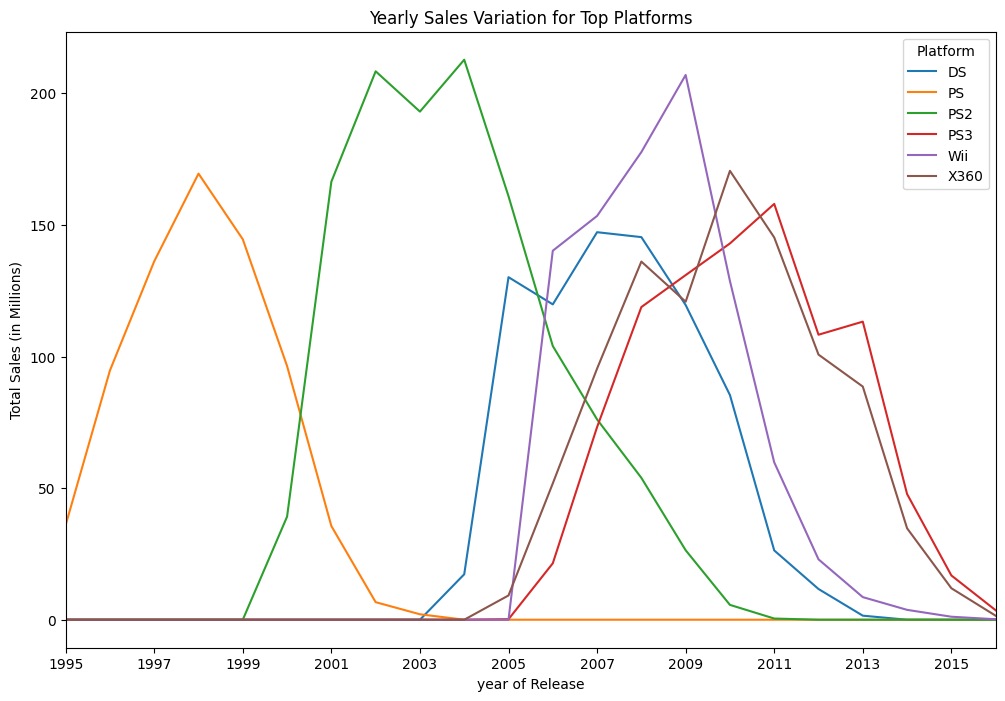

In [74]:
sales_by_year.T.plot(figsize=(12, 8))
plt.xlabel('year of Release')
plt.ylabel('Total Sales (in Millions)')
plt.title('Yearly Sales Variation for Top Platforms')
plt.legend(title='Platform')

plt.xlim(1995, sales_by_year.columns.max())
plt.xticks(range(1995, sales_by_year.columns.max() + 1, 2))

plt.show()

Ao analisar os dados produzidos nessa etapa percebemos que nenhuma das seis plataformas de mais sucesso têm vendas significativas hoje. É destaque também o fato de que a mudança de geração de consoles já impactou nas vendas de PS3, Xbox 360 e Wii. Podemos assumir que estamos entrando na geração PS4, Xone. Mas nenhum desses consoles teve tempo de mercado, até aqui, para entrar nos tops de venda de jogos, mas já estão ai há tempo suficiente para derrubar, nos dias de hoje, 2017, as vendas dos consoles anteriores (PS3, X360 e Wii). Essa hipótese pode servir de embasamento para campanhas publicitárias focadas nesses novos consoles, mesmo que eles não apareçam entre as top plataformas atualmente. Vamos testar.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

As vendas nas top plataformas foram olhadas de perto como solicitado! Bom trabalho!

</div>


<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Fala, professor! Esse comentário está em vermelho, mas me parece que você só errou a cor? Ou tem algo que valhe a pena mudar?
</div>

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Eu que me enganei com a cor, Luiz!

</div>


In [75]:
df_recent = df[df['year_of_release'] >= 2015]
platform_sales_recent = df_recent.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

In [76]:
platform_sales_recent

platform
PS4     188.15
XOne     86.29
3DS      42.92
WiiU     20.95
PS3      20.42
PC       13.77
X360     13.48
PSV      10.50
Wii       1.32
PSP       0.12
Name: total_sales, dtype: float64

Nesses códigos, criamos um dataframe que organiza, por quantidade de vendas a partir de 2015, as plataformas. Ele comprova nossa hipótese de que a mudança de geração está impactando diretamente nas vendas, e os consoles mais recentes, lançados a partir de 2011 pelo menos, lideram as vendas. Logo, ao passo que consoles como PS3, PC e Xbox 360 não podem ser completamente ignorados, o foco deve ser em PS4, Xone, 3DS e WiiU.

A pergunta que nos prpusemos a responder nesse trecho da análise é: Veja como as vendas variaram de plataforma para plataforma. Escolha as plataformas com as maiores vendas totais e construa uma distribuição com base em dados para cada ano. Encontre as plataformas que costumavam ser populares, mas agora não têm vendas. Quanto tempo leva para as novas plataformas aparecerem e as antigas desaparecerem?

Então vamos por partes:


As vendas de plataforma para plataforma variam de acordo com a chegada de novos consoles, mais modernos e mais potentes. Usando o Playstation, da Sony, como exemplo, vemos um pico de vendas no PS1 entre 1995 e o início dos anos 2000. A queda coincide com a explosão do PS2, que atingiu o pico entre 2001 e 2004, começando a despencar em 2006, ano que o PS3 chegou ao mercado. Este, então, superou o PS2 em 2007 e começou a despencar em 2012. O PS4 chegou ao mercado no ano seguinte.

Os gráficos também indicam que as melhotres plataformas tiveram ciclos de vida útil, entre crescimento, pico e queda, de cerca de 10 anos cada, com os picos atingidos no meio dessa vida útil. Essa análise, embasada pelo último gráfico, indica que o ano de 2017 tem a tendência de ser um dos mais altos em termos de vendas de jogos para a nova geração, considerando que PS4 e Xone, líderes de venda de 2015 para cá, foram lançados em 2013 e estão chegando na metade de suas "vidas úteis".

Determine para qual período você deve pegar dados. Para fazê-lo, olhe para suas respostas para as perguntas anteriores. Os dados te deveriam permitir construir um modelo para 2017.

Considerando os ciclos de vida útil dos consoles, apresentados no último gráfico, bem como os dados de vendas de todas as plataformas apresentados no primeiro gráfico de barras, o mais correto é reduzir o escopo e trabalhar com dados recolhidos de 2015 em diante.Eles refletem com mais exatidão as tendências do mercado de jogos e facilitam as previsões para o ano de 2017. 

Quais plataformas estão liderando em vendas? Quais estão crescendo ou diminuindo? Selecione várias plataformas potencialmente lucrativas.

As plataformas lançadas a partir de 2011 são as que mais geram lucros. Aqui, listamos PS4, Xone, 3DS, WiiU. Além delas, algum foco em PS3 e X360 pode trazer algum retorno. Porém, há mais uma hipótese a se testar. Diferentemente do que acontece com os Consoles tradiconais, os PCs não atingem picos de vendas, mas tem saída constante. De 2015 para cá, os PCs já superar os Xbox360 e é possível que, considerando a tendência de queda dos outros consoles mais antigos, o desempenho de vendas em 2017 seja superior nos computadores. Vamos analisar o ano de 2016 e ver como os valores de venda estão se comparados com 2015.

In [77]:
df_recent_2016 = df[df['year_of_release'] >= 2016]
platform_sales_2016 = df_recent_2016.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

In [78]:
platform_sales_2016

platform
PS4     69.25
XOne    26.15
3DS     15.14
PC       5.25
WiiU     4.60
PSV      4.25
PS3      3.60
X360     1.52
Wii      0.18
Name: total_sales, dtype: float64

Repetimos o código que recorta as vendas a partir de 2015 e replicamos para 2016. Ela restringe ainda mais a lista de consoles realmente lucrativos, mas também, na minha análise, confirma que os PCS tem um potencial até superior aos da antiga geração. Assim sendo, para aproveitar o momento de pico, os investimentos t~em de ser feitos em PS4, Xone e 3Ds. Para aproveitar o fluxo constante de vendas, também vale a pena dar certa atenção para as vendas no PC.

<div class="alert alert-danger">
<strong>Comentário do revisor v1</strong>

Luiz, batemos na trave aqui! 
    
O raciocínio está na direção correta, para prever 2017 realmente queremos dados recentes, mas apenas 2016 pode ser um pouco duro demais e fazer com que tenhamos um volume de informações insulficiente. O que acha de flexibilizar um pouco mais de acordo com o ciclo de vida que é esperado de uma plataforma.

</div>


<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Professor, aqui eu ainda não fiz nenhuma alteração, porque acho que você se confundiu. Eu decidi filtrar os dados e trabalhar com o conteúdo de 2015 para frente e não de 2016. Você vai reparar pelos códigos mais para cima que eu criei um dataframe chamado df_recent que filtra os dados a partir de 2015. É esse dataframe que eu uso para construir todos os gráficos e montar as análises que vêm mais a frente. 
    
É verdade que eu criei o dataframe df_recent_2016, mas ele só serviu para eu testar a minha hipótese sobre as vendas no PC! Enquanto trabalhava com os dados nessa etapa e decidia qual a melhor forma de agir, eu percebi que o PC crescia em vendas se comparado com o PS3 e o Xbox360, mas os dados escondiam essa informação, principalmente se verificássemos um período mais abrangente. O corte em 2016 veio para confirmar a queda de importâcia do PS3 e do X360 em relação ao próprio PC, mas só foi usado aqui. Esse insight não é tão significativo, porque o PC não é campeão de vendas, mas eu achei que foi uma das ideias mais legais que tive no projeto todo. Por isso todo esse cuidado! 
    
No mais, o projeto segue com o filtro em 2015. Para mim, tornar mais amplo é ruim, porque vai dar muita força para consoles como PS3, X360 e Wii, que, para 2017, tem tendência de não vender nada. Ainda assim, se você achar válido, podemos ampliar! EM qual ano você passaria o filtro, 2013 ou 2014?
</div>

<div class="alert alert-success">
<strong>Comentário do revisor v2</strong>

Perfei
</div>



### Vendas Totais por Plataforma (Diagrama de Caixa)

Construa um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma. As diferenças nas vendas são significativas? E quanto às vendas médias em várias plataformas? Descreva suas descobertas.

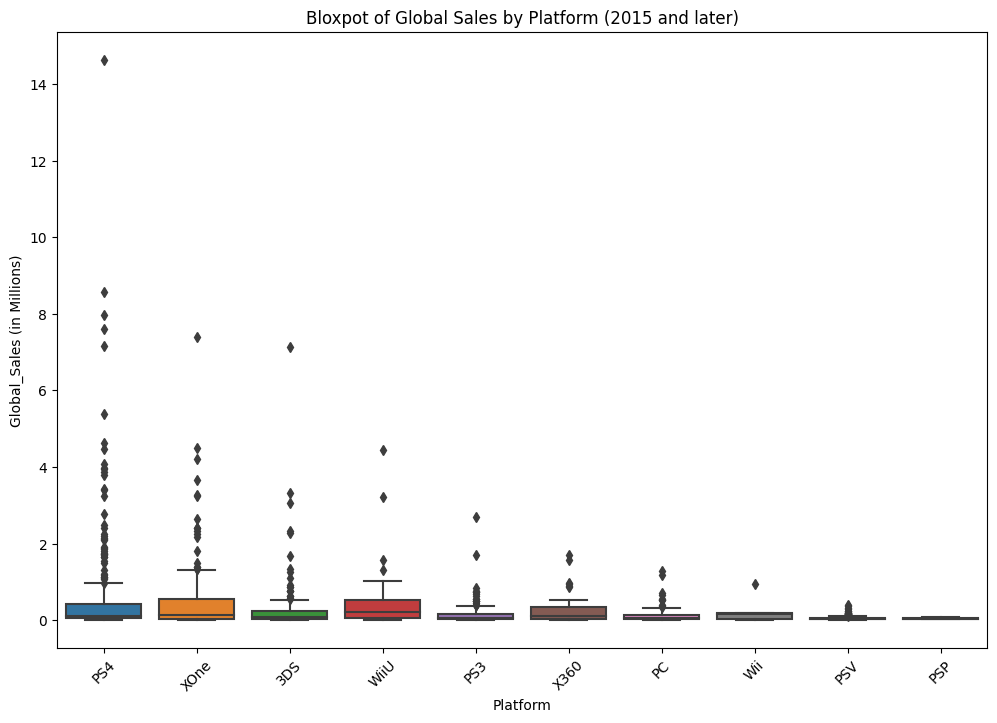

In [79]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_recent, x='platform', y='total_sales')
plt.xlabel('Platform')
plt.ylabel('Global_Sales (in Millions)')
plt.title('Bloxpot of Global Sales by Platform (2015 and later)')
plt.xticks(rotation=45)
plt.show()

Esse grafico de boxplots tem a visualização um pouco mais difícil, mas entrega alguns bons dados sobre o desempenho de vendas de plataforma para plataforma. Ele mantém a hipótese de que os consoles lançados a partir de 2011 têm o maior potencial de vendas. Dentro desse espectro, ele também indica que a maioria dos jogos não tem números tão exorbitantes em milhões de vendas. A maioria dos jogos, para todos os consoles, mal chega a 1 milhão de vendas. 

Por esse gráfico, percebemos que o PS4, o XOne e o WiiU tem caixas maiores, o que indica que seus jogos estão mais bem distribuídos dentro dos valores que alcançam. Isso significa que, para esses consoles, mais jogos conseguem chegar às casas de meio milhão, ou quase 1 milhão de unidades vendidas.

O gráfico também indica como PS4, XOne e 3DS, mas sobretudo o novo console da Sony, tem um grande potencial para grande sucessos. Para esses consoles, certos jogos furam a bolha e podem alcançar várias milhões de unidades. Existem outliers no Playstation 4 que superam os 14 milhões de cópias. Esse console também é o único a superar a marca de 8 milhões de vendas para jogos únicos.

Proporcionalmente falando, consoles como o 3DS, o Xbox 360, o PS3 e o PC também tem um bom potencial para grandes sucessos. De 2015 para cá, suas vendas são menores se comparadas com os top consoles do momento, mas eles também tem um bom número de outliers quando comparados à distribuição geral de suas vendas na tabela.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Noxplot fornecido conforme solicitado no enunciado.
</div>


### O Impacto das Avaliações nas Vendas

Nesse passo, vamos verificar a seguinte questão: Veja como as avaliações de usuários e profissionais afetam as vendas de uma plataforma popular (você escolhe). Construa um gráfico de dispersão e calcule a correlação entre revisões e vendas. Tire conclusões.

Para trabalhar com essa correlação, escolhi testar o PS4, que, nos anos de 2015 e 2016 foi o mais lucrativo. Para essa análise, vale lembrar que os boa parte dos dados não está disponível. Ao contrário do que fizemos na hora de corrigir a coluna de ano de lançamento, fazer qualquer preenchimento pode distorcer os resultados e não há uma lógica muito segura que nos permita fazer esse preenchimento. Fora isso, não podemos substituir os valores Nan por 0, porque um valor 0 pode ser mal interpretado como uma nota ruim ao invésde ausência de qualquer nota. Por isso, é importante entender que essa é uma análise parcial

In [80]:
df_ps4 = df_recent[df_recent['platform'] == 'PS4']

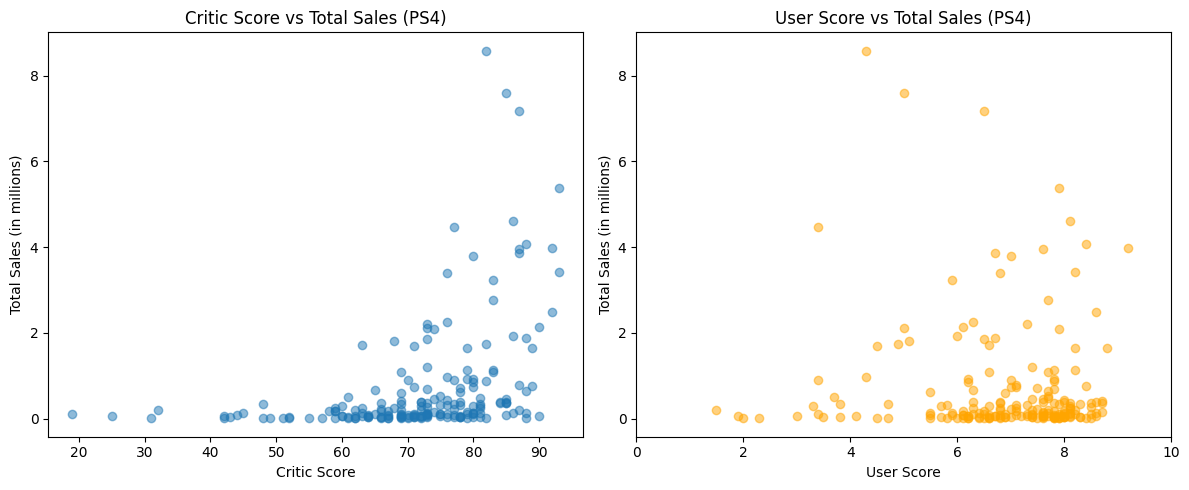

In [81]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_ps4['critic_score'], df_ps4['total_sales'], alpha=0.5)
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')
plt.title('Critic Score vs Total Sales (PS4)')


plt.subplot(1, 2, 2)
plt.scatter(df_ps4['user_score'], df_ps4['total_sales'], alpha=0.5, color='orange')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')
plt.title('User Score vs Total Sales (PS4)')

# Ajustar o limite e intervalo do eixo x para o gráfico de User Score
plt.xlim(0, 10)
plt.xticks(range(0, 11, 2))

plt.tight_layout()
plt.show()

Aqui, criamos um dataframe que traz apenas os dados da Plataforma PS4 a partir do ano de 2015, como tinhamos estabelecido. Logo depois, criamos 2 gráficos de dispersão. O primeiro levando em consideração o número de vendas e os valores de avaliações dos críticos. O segundo Levando em consideração as vendas e a avaliação dos jogadores. Antes de qualquer teste de correlação, já vemos que há sim um certo padrão, principalmente na nota dos críticos, que indica que os jogos que vendem mais tem, no geral, notas mais altas. A avaliação dos usuários é um pouco mais bem distribuída nesse sentido e jogos mal avaliados também podem vender muito bem. De qualquuer forma, vamos testar a correlação para os dois gráficos.

#### Testando a Correlação entre notas e vendas

Aqui, vamos usar o metodo corr() para testar a correlação das notas dos críticos x as vendas e a correlação da nota dos jogadores x as vendas.

In [82]:
correlation_critic = df_ps4['critic_score'].corr(df_ps4['total_sales'])

correlation_user = df_ps4['user_score'].corr(df_ps4['total_sales'])

print("Correlação entre Critic Score e Total Sales:", correlation_critic)
print("Correlação entre User Score e Total Sales:", correlation_user)

Correlação entre Critic Score e Total Sales: 0.3928485555130601
Correlação entre User Score e Total Sales: -0.05973845712638215


Os resultados diferem um pouco da primeira avaliação. Por esses números, percebemos que, de fato, existe uma certa correlação entre as notas dos críticos e as vendas. Isso significa que a tendnência é de que quanto maiores as notas, mais o jogo venderá. Porém diferentemente do que eu imaginava, essa correlação positiva é de fraca a moderada, ficando mais próxima de moderada. Ao passo que eu esperava que fosse mais forte.

Para os resultados de user_score, eu esperava uma correlação positiva, mesmo que menor do que o rsultado apresentado pelo gráfico das notas dos críticos. Ao invés disso, tivems uma correlação fraquíssima, porém negativa. Isso indica que as notas dos jogadores não interferem nas vendas dos jogos. Podemos considerar que um marketing bem feito compensa uma nota ruim dos jogadores, por exemplo. E que, para nossas eventuais campanhas de marketing, jogos com boas notas dos críticos, mesmo que com notas ruins dos jogadores são uma boa opção de investimento. mas isso apenas para o PS4. 

#### A importância das Notas nas vendas de outras plataformas (Xbox One)

Para fazer os teste para outras plataformas, escolhi o XBox One e o Nintendo 3DS, porque essas plataformas são as segunda e terceira que mais venderam no período analisado nesse estudo.

In [83]:
df_xone = df_recent[df_recent['platform'] == 'XOne']

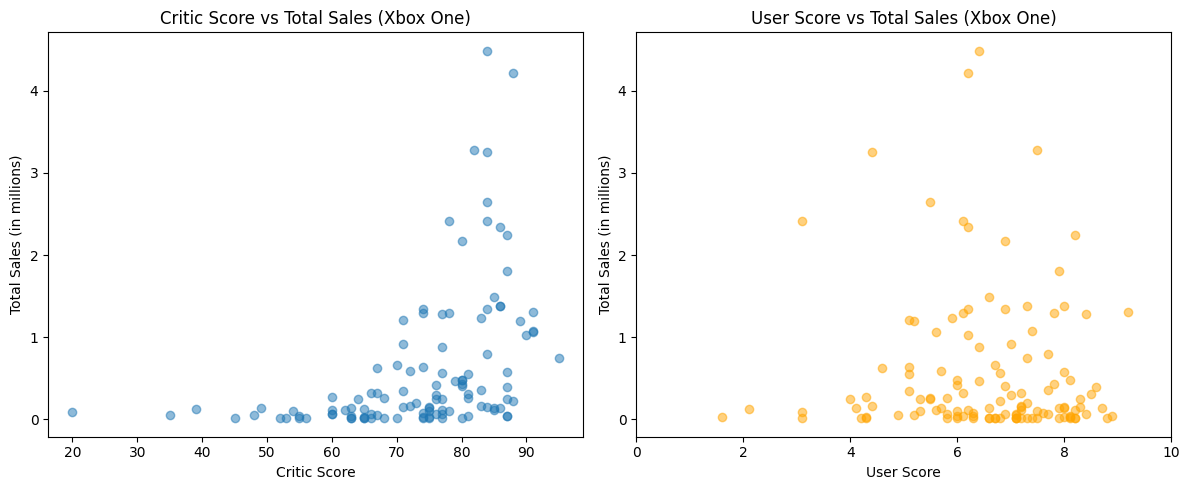

In [84]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df_xone['critic_score'], df_xone['total_sales'], alpha=0.5)
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')
plt.title('Critic Score vs Total Sales (Xbox One)')

plt.subplot(1, 2, 2)
plt.scatter(df_xone['user_score'], df_xone['total_sales'], alpha=0.5, color='orange')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')
plt.title('User Score vs Total Sales (Xbox One)')

plt.xlim(0, 10)
plt.xticks(range(0, 11, 2))

plt.tight_layout()
plt.show()

In [85]:
correlation_critic_xone = df_xone['critic_score'].corr(df_xone['total_sales'])

correlation_user_xone = df_xone['user_score'].corr(df_xone['total_sales'])

print("Correlação entre Critic Score e Total Sales:", correlation_critic_xone)
print("Correlação entre User Score e Total Sales:", correlation_user_xone)

Correlação entre Critic Score e Total Sales: 0.43088874582136805
Correlação entre User Score e Total Sales: -0.04146733387366271


O resultado dos gráficos e o valor de correlação deles indica que a hipótese montada para o PS4 também se encaixa aqui. As notas dos críticos interefere de forma moderada no desempenho em vendas de cada jogo. Por iss, focar em jogos com boas notas de críticos é uma boa ideia. Por outro lado, a correlação entre notas de usuários e desempenho em vendas é fraca e negativa, indicando que, como no PS4, as notas dos usuários não interferem no desempenho de vendas. Isso nos permite criar campanhas que abranjam jogos com notas altas para críticos e mais baixas para usuários sem problemas.

#### A importância das Notas nas vendas de outras plataformas (Nintendo 3DS)

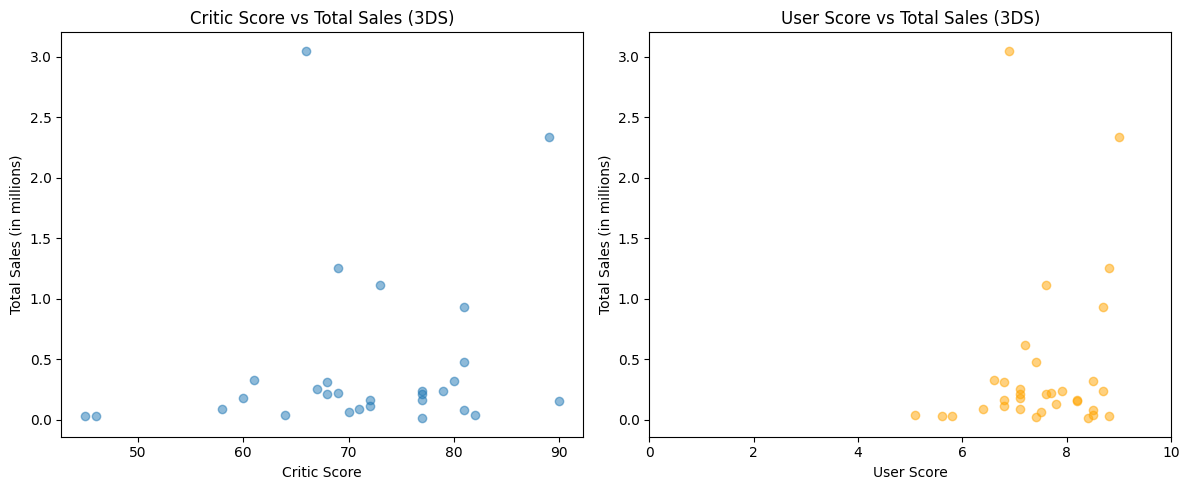

In [86]:
df_3ds = df_recent[df_recent['platform'] == '3DS']

plt.figure(figsize=(12, 5))

# Gráfico de dispersão para Critic Score vs Total Sales
plt.subplot(1, 2, 1)
plt.scatter(df_3ds['critic_score'], df_3ds['total_sales'], alpha=0.5)
plt.xlabel('Critic Score')
plt.ylabel('Total Sales (in millions)')
plt.title('Critic Score vs Total Sales (3DS)')

# Gráfico de dispersão para User Score vs Total Sales
plt.subplot(1, 2, 2)
plt.scatter(df_3ds['user_score'], df_3ds['total_sales'], alpha=0.5, color='orange')
plt.xlabel('User Score')
plt.ylabel('Total Sales (in millions)')
plt.title('User Score vs Total Sales (3DS)')
plt.xlim(0, 10)
plt.xticks(range(0, 11, 2))

plt.tight_layout()
plt.show()

Nessas linhas de código, apenas construímos novos gráficos de dispersão. Dessa vez, para o Nintendo 3DS. Em seguida, faremos o cálculo da correlação

In [87]:
correlation_critic_3ds = df_3ds['critic_score'].corr(df_3ds['total_sales'])

correlation_user_3ds = df_3ds['user_score'].corr(df_3ds['total_sales'])

print("Correlação entre Critic Score e Total Sales:", correlation_critic_3ds)
print("Correlação entre User Score e Total Sales:", correlation_user_3ds)

Correlação entre Critic Score e Total Sales: 0.17757455046092874
Correlação entre User Score e Total Sales: 0.19879627008102982


Quando o assunto é a avaliação da correlação das notas de críticos e usuários com as vendas do 3ds, fica claro que o cenário muda. Para ambos os casos há sim certa influência do nível das notas no desempenho do jogo, mas, em ambos os casos, a correlação é fraca. isso permite campanhas mais abrangentes. Focar em jogos com notas altas sempre será algo positivo, mas não é necessário se restringir nisso. Jogos campeões de vendas podem ter notas mais baixos e ainda assim ser trabalhados em futuras campanhas.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Incrível o trabalho com a análise da correlação entre avaliações e vendas.
    
Os plots adequados foram fornecidos para várias plataformas e o cálculo da correlação foi fornecido!

</div>


### O Impacto dos gêneros nas vendas dos Jogos

A última questão a se responder nessa etapa do projeto é: Dê uma olhada na distribuição geral de jogos por gênero. O que podemos dizer sobre os gêneros mais lucrativos? Você pode generalizar sobre gêneros com vendas altas e baixas? Por partes, vamos a ela!

#### Vendas Totais por Gênero e Média

In [88]:
genre_sales = df.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

In [89]:
genre_sales

genre
Action          1735.63
Sports          1326.71
Shooter         1050.02
Role-Playing     931.77
Platform         826.03
Misc             794.41
Racing           725.82
Fighting         443.59
Simulation       388.46
Puzzle           240.54
Adventure        233.35
Strategy         173.25
Name: total_sales, dtype: float64

In [90]:
genre_counts = df['genre'].value_counts()

genre_counts

Action          3342
Sports          2333
Misc            1735
Role-Playing    1484
Shooter         1311
Adventure       1294
Racing          1236
Platform         879
Simulation       860
Fighting         842
Strategy         678
Puzzle           573
Name: genre, dtype: int64

In [91]:
avg_sales_per_game = (genre_sales / genre_counts).sort_values(ascending=False)

avg_sales_per_game

Platform        0.939738
Shooter         0.800931
Role-Playing    0.627877
Racing          0.587233
Sports          0.568671
Fighting        0.526829
Action          0.519339
Misc            0.457873
Simulation      0.451698
Puzzle          0.419791
Strategy        0.255531
Adventure       0.180332
dtype: float64

Esses resultados já nos fornecem insights valiosos. Em termos de números absolutos, vemos a dominância de jogos de ação, esportes, tiro e RPG. Só esses números já justificariam investimentos de marketing nesses gêneros. Porém, a média nos fornece outras  informações importantes. Ao calcularmos a média, percebemos que jogos de plataforma e de corrida também tem um volume de venda médio elevado, que justifica o investimento nesses gêneros. O número absoluto deles é mais baixo por causa da quantidade de títulos produzida, que certamente é menor.

por outro lado, esses dados também destacam o péssimo desempenho de jogos de aventura e estratégia, que apresentaram números absolutos e médios muito baixos. Evitar trabalhar com esses g~eneros pode ser a melhor estratégia.

Vamos colocar essas informações em graficos para facilitar a visualização.

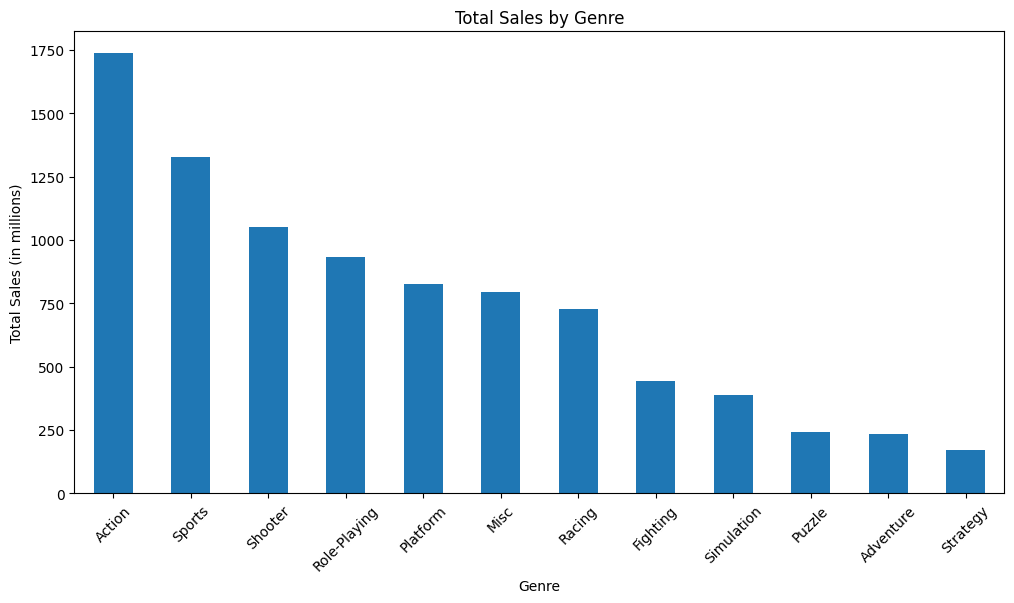

In [92]:
plt.figure(figsize=(12, 6))
genre_sales.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Total Sales (in millions)')
plt.title('Total Sales by Genre')
plt.xticks(rotation=45)
plt.show()

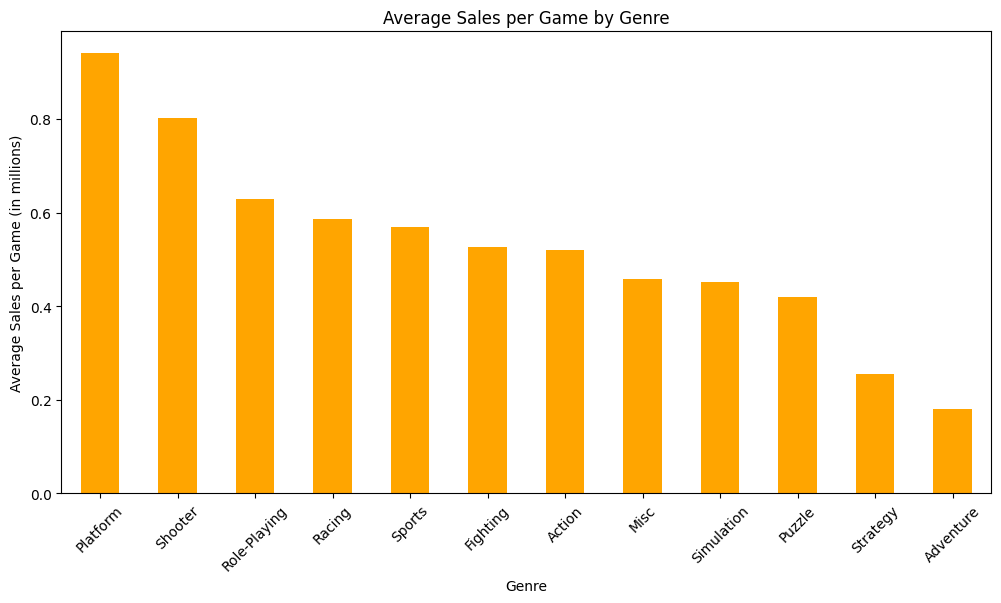

In [93]:
plt.figure(figsize=(12, 6))
avg_sales_per_game.plot(kind='bar', color='orange')
plt.xlabel('Genre')
plt.ylabel('Average Sales per Game (in millions)')
plt.title('Average Sales per Game by Genre')
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Olhamos o comportamento absoluto e médio por gênero. INsights foram fornecidos, muito bom!

</div>


## (Etapa 4) Crie um perfil de usuário para cada região

Entramos na etapa de criação de perfil de usuário para cada região. As respostas que precisamos para completar essa etapa são: 

Para cada região (AN, UE, JP), determine:

As cinco plataformas principais. Descreva as variações das suas quotas de mercado de região para região.

Os cinco principais gêneros. Explique a diferença.

As classificações do ESRB afetam as vendas em regiões individuais?


### Calculando as vendas totais de cada plataforma e sua quota por região

#### América do Norte

In [94]:
platform_sales_na = df_recent.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
platform_sales_na

platform
PS4     63.86
XOne    50.30
3DS     10.31
WiiU     8.86
X360     8.05
PS3      5.66
PC       3.72
PSV      0.54
Wii      0.49
PSP      0.00
Name: na_sales, dtype: float64

In [95]:
total_sales_na = df_recent['na_sales'].sum()

platform_market_share_na = (platform_sales_na / total_sales_na) * 100

print("Quotas de mercado na América do Norte (NA)")
platform_market_share_na

Quotas de mercado na América do Norte (NA)


platform
PS4     42.071283
XOne    33.137888
3DS      6.792279
WiiU     5.837012
X360     5.303380
PS3      3.728836
PC       2.450754
PSV      0.355755
Wii      0.322814
PSP      0.000000
Name: na_sales, dtype: float64

#### Europa

In [96]:
platform_sales_eu = df_recent.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
platform_sales_eu

platform
PS4     83.54
XOne    28.10
PC       9.10
3DS      7.39
PS3      7.30
WiiU     6.49
X360     4.21
PSV      1.08
Wii      0.73
PSP      0.00
Name: eu_sales, dtype: float64

In [97]:
total_sales_eu = df_recent['eu_sales'].sum()

platform_market_share_eu = (platform_sales_eu / total_sales_eu) * 100

print("\nQuotas de mercado na Europa (EU)")
(platform_market_share_eu)


Quotas de mercado na Europa (EU)


platform
PS4     56.468839
XOne    18.994187
PC       6.151142
3DS      4.995268
PS3      4.934433
WiiU     4.386914
X360     2.845748
PSV      0.730026
Wii      0.493443
PSP      0.000000
Name: eu_sales, dtype: float64

#### Japão

In [98]:
platform_sales_jp = df_recent.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
platform_sales_jp

platform
3DS     23.55
PS4     12.05
PSV      8.41
PS3      4.97
WiiU     4.12
XOne     0.18
PSP      0.12
PC       0.00
Wii      0.00
X360     0.00
Name: jp_sales, dtype: float64

In [99]:
total_sales_jp = df_recent['jp_sales'].sum()

platform_market_share_jp = (platform_sales_jp / total_sales_jp) * 100

print("\nQuotas de mercado no Japão (JP)")
platform_market_share_jp


Quotas de mercado no Japão (JP)


platform
3DS     44.101124
PS4     22.565543
PSV     15.749064
PS3      9.307116
WiiU     7.715356
XOne     0.337079
PSP      0.224719
PC       0.000000
Wii      0.000000
X360     0.000000
Name: jp_sales, dtype: float64

Essas linhas de código criam dataframes que agrupam as plataformas e nos trazem as vendas de cada uma em cada uma das três regiões destacadas. Percebemos algumas diferenças interessantes entre as vendas de lugar para lugar. 

Primeiro, na América do Norte,temos a liderança do PS4, mas um certo equilíbrio com o XOne, que vem em segundo e tem uma boa fatia do mercado. Do Xbox One em diante, percebemos um abismo, com uma queda de vendas considerável para os outros consoles. Ainda percebemos que os consoles tradicionais levam a preferência em relação ao PC, que nunca deixa de receber novos lançamentos, mas ainda assim vende menos do que consoles mais antigos.

Na Europa é diferente. O PS4 também é líder em vendas, mas domina o mercado praticamente sozinho. O Xone, em segundo, mal tem um terço das vendas do PS4. Também consideravelmente atrás em relação ao XOne, o PC vem em terceiro, o que denota a segunda mudança comportamental de uma região para outra. Aqui, o PC vende mais do que os consoles da antiga geração e os concorrentes da Nintendo. 

Já o Japão é a região que mais se difere entre as três. Aqui, a Nintendo lidera, com quase o dobro de vendas em relação ao PS4, que vem em segundo. No país do Sol Nascente, os números de vendas ainda são bem menores do que eram para os primeiros colocados de América do Norte e Europa. Além disso, a Nintendo e a Sony, produtoras japonesas, lideram, demonstrando uma preferência pelo mercado nacional de consoles. A Microsoft tem uma quantidade quase insignificante de vendas.

Esses números mostram que estratégias de marketing mais eficazes serão as que focam no PS4, de forma geral. Mas fica claro que são necessárias estratégias diferentes, principalmente em relação ao Japão. PAra os japoneses, o interessante é aumentar a atenção para os consoles nacionais e ignorar completamente o Xbox. Na América do Norte, focar no PS4, mas também em consoles tradicionais de forma geral. Para a Europa, grande foco em PLaystation 4 e algumaatenção para Xone e PC são recomendadas.

As quotas de mercado corroboram com a análise traçada. Na Europa e na América do Norte, A dupla PS4/Xone tem entre 65% e 70% das vendas totais. No Japão, os consoles da casa têm 99.7% de fatia de mercado, o que denota a fraqueza do consoles da Microsoft no páis.

### Os 5 Principais Gêneros por Região

Nesse passo, vamos calcular as vendas dos cinco principais gêneros por região e fazer uma análise comparativa para termos uma ideia das diferenças de comportamento e quais jogos são os preferidos de país para país

In [100]:
genre_sales_na = df_recent.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
genre_sales_eu = df_recent.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
genre_sales_jp = df_recent.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

#### América do Norte

In [101]:
genre_sales_na

genre
Shooter         48.18
Action          33.68
Sports          26.31
Role-Playing    19.82
Misc             5.58
Name: na_sales, dtype: float64

#### Europa

In [102]:
genre_sales_eu

genre
Shooter         40.28
Action          34.82
Sports          27.82
Role-Playing    17.21
Racing           6.52
Name: eu_sales, dtype: float64

#### Japão

In [103]:
genre_sales_jp

genre
Action          23.05
Role-Playing    13.41
Shooter          3.79
Misc             3.19
Adventure        2.22
Name: jp_sales, dtype: float64

Por esses resultados, percebemos que existem bastante semelhanças nas preferências de gêneros de jogos nos mercados da América do Norte e Europa. Além disso, só o Japão apresenta grandes diferenças comportamentais nesse sentido. 

Primeiro os jogos preferidos na América do Norte e na Europa são Tiro, Ação, Esportes e RPG, respectivamente. São esses gêneros que dominam praticamente todo o mercado nas duas regiões são MISC para a AMérica do Norte e Corrida para a Europa, mas suas vendas são poucas se comparadas com o top 4. POdemos ver que os jogos de Tiro e de RPG, primeiro e quarto em ambas as tabelas, têm mais vendas na América do Norte do que têm na Europa, enquanto que os jogos de Ação e Esportes vendem um pouco mais em território Europeu do que em Americano. AInda assim, os números são bem próximos em todos os casos. São nesses jogos que as estratégias de marketing devem focar para esses páises. Se a estratégia for ainda mais restrita, jogos de Ação e Tiro têm de ser o foco.

No Japão, a coisa, mais uma vez, muda de figura. Os jogos atingem números menores e é o Gênero de Ação o que mais vende, seguid de RPG, Tiro, MISC e Aventura, respectivamente. É interessante perceber a diferença gritante na procura de jogos de Tiro. Apesar do gênero aparecer em terceiro na lista de vendas do Japão, os números são muito baixos. A dificuldade de portar esses jogos para consoles da Nintendo de forma mais efetiva pode ser uma boa justificativa. De qualquer forma, as estratégias mais eficazes serão as que focarem jogos de Ação e RPG.

### O Impacto da ESRB nas Vendas por Região

Nessa etapa, vamos trazer os dados de vendas por rating de cada região como dataframe e como gráficos para facilitar a visualização. Enquanto analisava os gráfics da mérica do Norte, percebi que quanto mais alta a faixa etária necessária para jogar um jogo, mais ele vendia, o que contraria a expectativa de que, por serem mais restritos, esses jogos não venderiam tanto. 

Mas esse resultado também pode ser explicado pela quantidade de títulos classificados nessa faixa, que pode ser maior do que o resto. por isso, antes de fazer a análise por região, vamos verificar a quantidade de títulos por classificação da ESRB. 

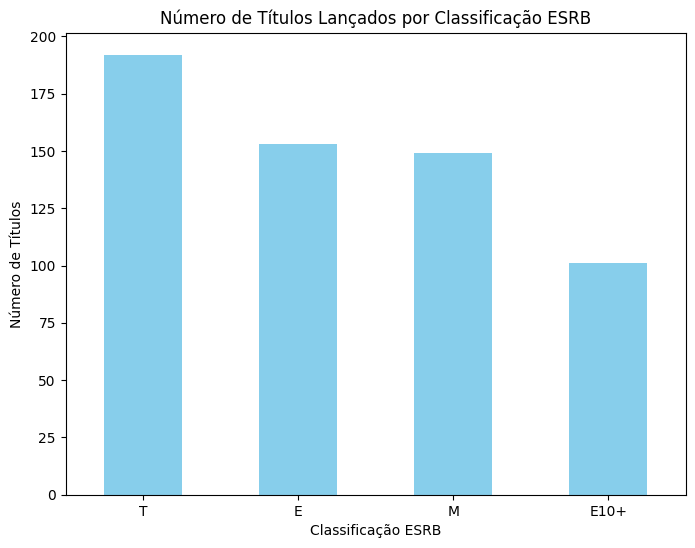

In [104]:
rating_counts = df_recent['rating'].value_counts()

plt.figure(figsize=(8, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Número de Títulos Lançados por Classificação ESRB')
plt.xlabel('Classificação ESRB')
plt.ylabel('Número de Títulos')
plt.xticks(rotation=0)
plt.show()

O gráfico mostra que os títulos com classificação Teen e Everyone são os mais lançados. Mature vem apenas em terceiro, apesar de ser a classificação mais procurada na América do Norte. Abordaremos mais sobre os resultados nas análises de cada região.

#### América do Norte

In [105]:
rating_sales_na = df_recent.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

rating_sales_na

rating
M       47.03
E       26.59
T       22.86
E10+    17.87
Name: na_sales, dtype: float64

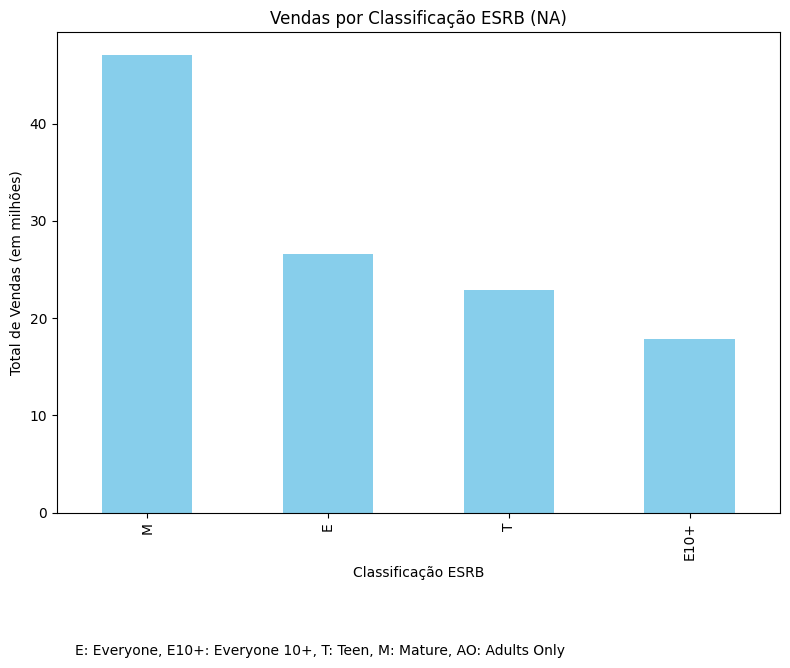

In [106]:
esrb_labels = {
    'E': 'Everyone (Livre para todas as idades)',
    'E10+': 'Everyone 10+ (Maiores de 10 anos)',
    'T': 'Teen (Maiores de 13 anos)',
    'M': 'Mature (Maiores de 17 anos)',
    'AO': 'Adults Only (Maiores de 18 anos)'
}

plt.figure(figsize=(8, 6))
rating_sales_na.plot(kind='bar', color='skyblue')
plt.title('Vendas por Classificação ESRB (NA)')
plt.xlabel('Classificação ESRB')
plt.ylabel('Total de Vendas (em milhões)')

plt.figtext(0.1, -0.1, 
            'E: Everyone, E10+: Everyone 10+, T: Teen, M: Mature, AO: Adults Only',
            ha='left', fontsize=10)

plt.tight_layout()
plt.show()

Seria de se esperar que os jogos feitos para faixas etárias mais abrangentes fossem os mais procurados, principalmente, porque na América do Norte, as classificações da ESRB são mais respeitadas do que no Brasil. Ainda assim, os jogos mais procurados são, com folga, os para maiores de idade. Quando levamos os dois gráficos em consideração vemos que, apesar de ser a categoria com mais lançamentos, os jogos Teen não t~em um desempenho de vendas tão bom.

Os jogos E10+ são os menos prosduzidos e menos vendidos. Isso se explica porque essa é uma categoria que abrange um intervalo menor de faixas etárias, ficando entre o Teen e o Everyone. De qualquer forma, para a América do Norte, focar em jogos para maiores é a melhor forma de impulsionar as vendas. 

#### Europa

In [107]:
rating_sales_eu = df_recent.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

rating_sales_eu

rating
M       45.54
E       34.83
T       20.32
E10+    11.54
Name: eu_sales, dtype: float64

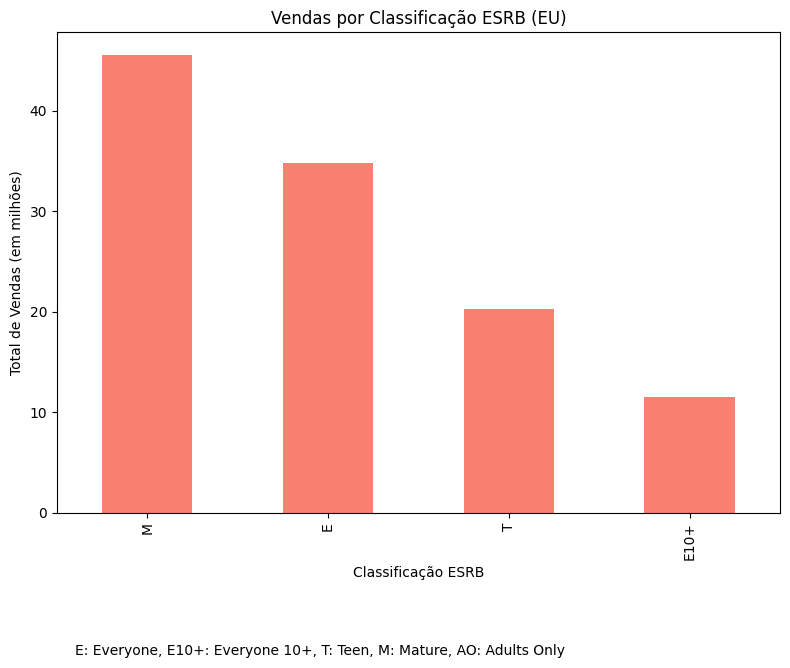

In [108]:
plt.figure(figsize=(8, 6))
rating_sales_eu.plot(kind='bar', color='salmon')
plt.title('Vendas por Classificação ESRB (EU)')
plt.xlabel('Classificação ESRB')
plt.ylabel('Total de Vendas (em milhões)')

plt.figtext(0.1, -0.1, 
            'E: Everyone, E10+: Everyone 10+, T: Teen, M: Mature, AO: Adults Only',
            ha='left', fontsize=10)

plt.tight_layout()
plt.show()

Aqui, percebemos uma certa semelhança no comportamento do consumidor na América do Norte e na Europa, ainda que os perfis não sejam exatamente iguais. mais uma vez, os títulos "Mature" são os mais vendidos, apesar de serem apenas o terceiro mais produzido. Mas na Europa, os títulos "Everyone" tem bem mais vendas e se aproximam da categoria mature. Eles também criaram uma diferença maior para os títulos teen se compararados com o gráfico NA. Aqui, o desempenho dos jogos Teen é ainda pior. Qualquer estratégia de marketing bem sucedida dará atenção aos jgos Mature e em jogos Everyone.

#### Japão

In [109]:
rating_sales_jp = df_recent.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

rating_sales_jp

rating
T       7.70
E       5.25
M       4.29
E10+    3.27
Name: jp_sales, dtype: float64

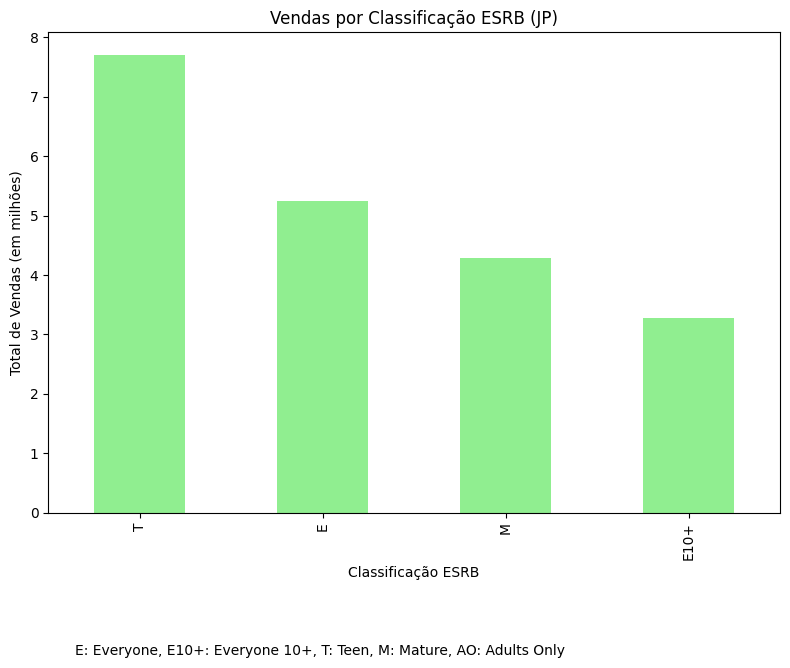

In [110]:
plt.figure(figsize=(8, 6))
rating_sales_jp.plot(kind='bar', color='lightgreen')
plt.title('Vendas por Classificação ESRB (JP)')
plt.xlabel('Classificação ESRB')
plt.ylabel('Total de Vendas (em milhões)')

plt.figtext(0.1, -0.1, 
            'E: Everyone, E10+: Everyone 10+, T: Teen, M: Mature, AO: Adults Only',
            ha='left', fontsize=10)

plt.tight_layout()
plt.show()

Aqui, percebemos uma grande diferença comportamental em relação às outras regiões. Aqui, os números de venda são bem menores, o que se justifica se compararmos o tamanho do Japão e de sua população com o tamanho das outras regiões. Fora isso, é no Jqapão que os jogos Teen se destacam e são os mais vendidos. Os jogos Everyone vem logo atrás. Os títulos Mature despencam para a terceira posição, vendendo cerca de um décimo do que vendem nas outras regiões. E10+ segue em último, mas a explicação da quantidade de títulos lançados e a faixa etária que a classificação abrange justificam isso.

Essa diferença comportamental pode ser jusificada, em partes, pela preferência do público japonês pelos consoles da Nintendo, conyhecida pela produção de séries e jogos mais casuais como Mario e Zelda. De toda forma, focar campanhas de jogos teen e everyone é o caminho para o sucesso em território japonês.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Agrupamentos regionais realizados e comparados levando em conta plataformas, gênero e classificação. Muito bom!
</div>



## (Etapa 5) Teste de Hipóteses

Finalmente chegamos na etapa do teste de hipótese. Aqui, as hipóteses apresentadas são:

— As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

— As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

Então, formularemos uma hipótese nula e uma hipótese alternativa para cada uma dessas proposições e faremos os testes. Por padrão, a hipótese nula é aquela que nega a hipótese proposta. Por isso, a hipótese nula para a proposição número 1 é:

As classificações médias dos usuários das plataformas Xbox One e PC NÃO são as mesmas.

A Hipótese alternativa é aquela que confirma a hipótese proposta, logo, ela será a própria proposta. 

Para a segunda proposta, a hipótese nula será:

As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são IGUAIS.

Já a hipótese alternativa, mais uma vez será a própria proposta.

Manteremos o valor alfa em 5% para esses testes, isso porque essa é uma prática padrão do mercado e nenhum valor alfa específico foi pedido.

### Hipótese 1: As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

In [111]:
xbox_one_scores = df_recent[df_recent['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df_recent[df_recent['platform'] == 'PC']['user_score'].dropna()

# Definir o nível de significância
alpha = 0.05

# Realizar o teste t de Student
t_stat, p_value = ttest_ind(xbox_one_scores, pc_scores, equal_var=True)

# Exibir os resultados
print(f"Estatística t: {t_stat}")
print(f"Valor-p: {p_value}")

# Avaliar o resultado com a formulação atual
if p_value < alpha:
    print("Rejeitamos a hipótese nula: as classificações médias dos usuários das plataformas Xbox One e PC são iguais.")
else:
    print("Não rejeitamos a hipótese nula: há evidência suficiente para afirmar que as classificações médias dos usuários das plataformas Xbox One e PC são diferentes.")

Estatística t: 1.088070274037042
Valor-p: 0.2778542084733835
Não rejeitamos a hipótese nula: há evidência suficiente para afirmar que as classificações médias dos usuários das plataformas Xbox One e PC são diferentes.


O teste não confirma hipótese nenhuma e deixa claro que não podemos descartar a hipótese de que as classificações médias de usuários de xbox e pc são diferentes. O resultado do valor p indica uma diferença perceptivel nas classificações dos usuários das duas plataformas, o que quer dizer que, mesmos jogos iguais, podem apresentar diferenças de performance, de qualidade ou de bugs de uma plataforma pra outra. Também pode significar gostos diferentes entre os públicos. Dessa forma, não pode mos criar apenas uma estratégia de marketing para as duas plataformas. Cada uma tem de ser trabalhada individualmente.

### Hipótese 2: As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

In [112]:
action_scores = df_recent[df_recent['genre'] == 'Action']['user_score'].dropna()
sports_scores = df_recent[df_recent['genre'] == 'Sports']['user_score'].dropna()

# Definir o nível de significância
alpha = 0.05

# Realizar o teste t de Student
t_stat, p_value = ttest_ind(action_scores, sports_scores, equal_var=True)

# Exibir os resultados
print(f"Estatística t: {t_stat}")
print(f"Valor-p: {p_value}")

# Avaliar o resultado com a nova formulação
if p_value < alpha:
    print("Rejeitamos a hipótese nula: as classificações médias dos usuários para os gêneros Action e Sports são diferentes.")
else:
    print("Não rejeitamos a hipótese nula: não há evidência suficiente para afirmar que as classificações médias dos usuários para os gêneros Action e Sports são diferentes.")

Estatística t: 7.842209482377116
Valor-p: 1.0012846807938657e-13
Rejeitamos a hipótese nula: as classificações médias dos usuários para os gêneros Action e Sports são diferentes.


Aqui, nós rejeitamos a hipóese nula. O valor do teste deixou claro que as classificações são diferentes. Dessa forma. Porém, qualquer estratétgia de Markedting precisa levar em consideração as vendas de cada u dos dois gêneros e ponderar sobre o fato de que análises feitas mais cedo no projeto mostram que a avaliação do público não impacta nas vendas dos jogos.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Os testes foram formulados, implementados e analisados corretamente. Muito bom!
</div>


## (Etapa 6) Conclusão do Projeto

Finalmente terminamos o projeto! Agora, vamos repassar algumas das decisões tomadas e dos resultados apresentados pela análise. 

Primeir, é importante destacar a escolha por filtrar os dados a partir de 2015 em diante. isso acontece porque dados mais antigos não tem utilidade na previsão do futuro próximo e podem atrapalhar o trabalho, trazendo dados sobre consoles antigos e desviando a atenção dos consoles que mais vendem atualmente. Por exep=mplo, o PS2 foi rei de vendas, mas já está fora de circulação. Criar uma análise que leva em consid3eração os números desse console seria inútil, porque não podemos mais trabalhar com ele.

Outra decisão importante foi a de não preencher notas faltantes para público, críticos e ratings da ESRB. Tomei essa deicsão porque entregar uma analise parcial, mas correta, dos dados é melhor do que entregar uma informação mascarada ou indevidamente manipulada em qualquer direção pelo uso de médias ou medianas quando não há nenhum caminho lógico para usá-las.


Os Dados: Algumas observações sobre os resultados obtidos


Vale relembrar que as plataformas que mais merecem atenção, de forma geral, são o Playstation 4 e o Xbox One. Esses são os campeões de venda por muito. O Pc tem entrada constante, por isso não pode ser ignorado. Os consoles da Nintendo t~em de ser trabalhados em campanhas específicas voltadas para o território japonês

Já os gêneros que mais devem ser trabalhados são: Ação, Tiro, Esportes e RPG. São eles que apresentaram o melhor desempenho entre as regiões, com especial destaque para os jogos de tiro na América do Norte e na Europa. Além disso, com os g~eneros em mãos, vale lembrar que as notas dos críticos têm alguma influência no desempenho de vendas de cada título, mas que as notas dos usuários não significam praticamente nada.

América do Norte e Europa mostraram tendências parecidas em suas preferências por jogos "Mature" e "Everyone", apesar de variações menores na proporção de vendas para as classificações "Teen". Jogos para adultos (Mature) foram muito bem na América do Norte, enquanto na Europa, os títulos "Everyone" ficaram bem próximos do tipo "Mature".

Japão, por outro lado, apresentou um comportamento distinto: jogos com classificação "Teen" lideraram as vendas, seguidos de perto por jogos "Everyone". A preferência dos japoneses pela Nintendo pode ajudar a justificar esse quadro. mas vale lembrar que o Japão apresentou um perfil comportalmental be diferente em praticamente todos os critéiros avaliados. Por isso, será muito importante campanhas bem distintas para trabalhar na região.

Recomendações de Marketing e Estratégia:

Focar em campanhas para os consoles mais populares, especialmente PS4 e Xbox One, garantindo que jogos com classificações "Mature" e "Everyone" sejam promovidos com destaque.

No Japão, adaptar as campanhas para jogos "Teen" e "Everyone", aproveitando a forte base de fãs da Nintendo e o apelo por jogos casuais.

Jogos bem avaliados por críticos devem ser priorizados em campanhas, uma vez que as notas dos críticos demonstraram uma correlação positiva com o sucesso de vendas.

<div class="alert alert-success">
<strong>Comentário do revisor v1</strong>

Conclusão apresentada fconforme solicitado.
</div>
